In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
print(torch.__version__)

1.10.2


# Blood cell detection

## 1. Dataset

In this assessment, we used Blood Cell Detection Dataset hosted at Kaggle.

This dataset contains 100 annotated images of red blood cells(RBC) and white blood cells(WBC) collected from peripheral blood smear slides taken from a light microscope, with 2237 labeled RBC and 103 WBC. Each image is 256 pixels in both height and width.

In this notebook, we read in the dataset containing coordinates for the annotated cells’ bounding box ("annotations.csv") and simply visualized sample images on blood cells. We included the visulization of other images with drawn bounding boxes in the model implementations (Faster RCNN, SSD, YOLO).

## 2. Load data & Image

In [3]:
annotation = pd.read_csv("Data/annotations.csv")

In [4]:
annotation

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc
...,...,...,...,...,...,...
2335,image-69.png,227.765502,207.710259,256.000000,248.054115,rbc
2336,image-69.png,201.832018,211.930101,251.736189,256.000000,rbc
2337,image-69.png,81.188275,231.883878,130.855693,254.391206,rbc
2338,image-69.png,35.903044,244.555806,79.863585,255.066516,rbc


In [5]:
import glob
import cv2
import skimage

In [6]:
images = [cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2RGB) for file in glob.glob("Data/images/*.png")]
images = np.array(images)

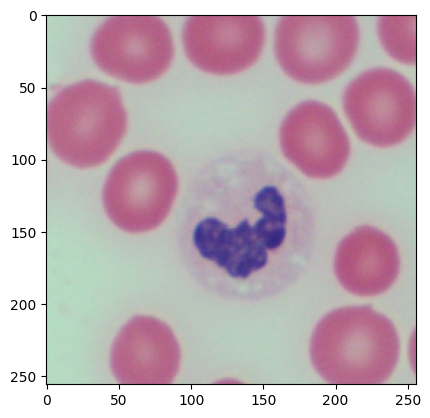

In [7]:
plt.imshow(images[3,:,:,:])
plt.show()
image = images[3,:,:,:]

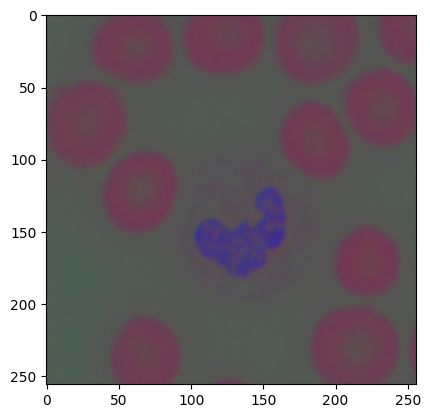

In [8]:
norm_img = image.copy()
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            norm_img[i,j,k] = (image[i,j,k]/np.sum(image[i,j,:]))*255
plt.imshow(norm_img)
plt.show()

## Following steps

We put the implementation of three models in seperate jupyter notebooks, including tasks listed as below:

- Visualize sample blood cell images with annotations of RBC and WBC.
- Implement deep learning model for blood cell detection and classification using PyTorch package. Here we chose Faster RCNN, SSD and YOLO.
- Arrange the dataset for the training and testing of the models.